In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data for Training for "ForTraining_0001.csv".

### Data has two input columns/features/independent variables as numbers called A and B
### 9 mathematical operations have been performed to generate 9 dependent numerical columns
#### They are as below

* Addition = A + B
* Subtraction = A - B
* Multiplication = A * B
* Division = A / B
* Sin(Addition) = sin (A + B)
* Cos(Addition) = cos (A + B)
* sqrt(Addition) = SQRT( A + B) if (A + B) >= 0 or -1.00 if (A +B ) < 0
* 2 ^ Addition = 2 ^ (A +B)
* Log(Addition) = log(A + B)

### Additionally there is a dependent column present for classification training.
* ODD_OR_EVEN(CEIL(A+B)) = If MODULUS of CEIL(A + B) = 0 then "EVEN" else "ODD" [To be used for *classification training *]

In [2]:
Master_DF = pd.read_csv("./ForTraining_0001.csv")

In [3]:
Master_DF

,A,B,Addition,Subtraction,Multiplication,Division,Sin(Addition),Cos(Addition),Sqrt(Addition),2^Addition,Log(Addition),ODD_OR_EVEN(CEIL(A+B))
0,9.93,9.06,18.99,0.87,89.97,1.10,0.14,0.99,4.36,520666.48,1.28,Odd
1,-3.56,3.48,-0.08,-7.04,-12.39,-1.02,-0.08,1.00,-1.00,0.95,-1.00,Even
2,-7.52,8.24,0.72,-15.76,-61.96,-0.91,0.66,0.75,0.85,1.65,-0.14,Odd
3,-1.92,3.37,1.45,-5.29,-6.47,-0.57,0.99,0.12,1.20,2.73,0.16,Even
4,-5.55,7.42,1.87,-12.97,-41.18,-0.75,0.96,-0.29,1.37,3.66,0.27,Even
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.84,6.22,3.38,-9.06,-17.66,-0.46,-0.24,-0.97,1.84,10.41,0.53,Even
9996,-5.01,7.38,2.37,-12.39,-36.97,-0.68,0.70,-0.72,1.54,5.17,0.37,Odd
9997,4.74,-0.18,4.56,4.92,-0.85,-26.33,-0.99,-0.15,2.14,23.59,0.66,Odd
9998,-5.86,-0.03,-5.89,-5.83,0.18,195.33,0.38,0.92,-1.00,0.02,-1.00,Odd


In [12]:
class Training_Tensorflow:
    
    def __init__(self, 
                 A = Master_DF.A, 
                 B = Master_DF.B, 
                 OutputVector=None, 
                 ClassificationOrRegression="Regression"):
        
        self.A = A
        self.B = B
        self.OutputVector = OutputVector
        self.TypeOfTraining = ClassificationOrRegression
        self.Training_DF = None
        self.Test_DF = None
        self.Model = None
        self.Predicted_DF = None
        self.TrainTestSplit()
        
    def TrainTestSplit(self, TestFractionSize=0.2):
        self.Training_DF, self.Test_DF = train_test_split(Master_DF, test_size=TestFractionSize)
        
    def TrainTheModel(self, DenseNodeSize = 1000, activation='linear',optimizer='sgd', loss='mean_squared_error'):
        self.Model = tf.keras.Sequential()
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.compile(optimizer=optimizer,loss=loss)
        xs = np.array([(a,b) for a,b in zip(self.Training_DF.A,self.Training_DF.B)])
        ys = np.array(self.Training_DF[self.OutputVector], dtype='float')
        self.Model.fit(xs,ys,epochs=25)
        
    def PredictTheResult(self):
        self.Predicted_DF = pd.DataFrame(columns=['InputVals','PredictedVals','Difference'],dtype='float')
        self.Predicted_DF.InputVals = self.Test_DF[self.OutputVector]
        xs = np.array([(a,b) for a,b in zip(self.Test_DF.A,self.Test_DF.B)])
        self.Predicted_DF.PredictedVals = self.Model.predict(xs)[:len(self.Test_DF)]
        self.Predicted_DF.Difference = self.Predicted_DF.InputVals - self.Predicted_DF.PredictedVals
        
    def PredictOneVal(self, A=None, B=None):
        return np.round(self.Model.predict(np.array([[A,B]]))[0][0],2)
    
    def PlotThePredicted_DF(self):
        plt.figure()
        plt.plot(range(len(self.Test_DF)),self.Predicted_DF.Difference)
        plt.show()

# Let us try to see if we can learn addition behavior between A and B

In [213]:
AdditionTraining = Training_Tensorflow(OutputVector='Addition')
AdditionTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 277us/sample - loss: 14.5529
Epoch 2/25
8000/8000 [==============================] - 2s 249us/sample - loss: 0.0142
Epoch 3/25
8000/8000 [==============================] - 2s 250us/sample - loss: 0.0063
Epoch 4/25
8000/8000 [==============================] - 2s 255us/sample - loss: 0.0031
Epoch 5/25
8000/8000 [==============================] - 2s 252us/sample - loss: 0.0017
Epoch 6/25
8000/8000 [==============================] - 2s 251us/sample - loss: 9.3698e-04
Epoch 7/25
8000/8000 [==============================] - 2s 252us/sample - loss: 5.3797e-04
Epoch 8/25
8000/8000 [==============================] - 2s 251us/sample - loss: 3.1506e-04
Epoch 9/25
8000/8000 [==============================] - 2s 251us/sample - loss: 1.8714e-04
Epoch 10/25
8000/8000 [==============================] - 2s 252us/sample - loss: 1.1235e-04
Epoch 11/25
8000/8000 [==============================] - 2s 252us/sample - loss: 6.799

In [214]:
AdditionTraining.PredictOneVal(A=220,B=300)

520.0

In [215]:
AdditionTraining.PredictTheResult()

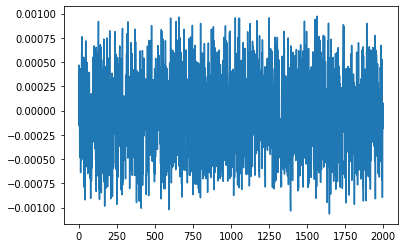

In [216]:
AdditionTraining.PlotThePredicted_DF()

# Let us try to see if we can learn subtraction behavior between A and B

In [217]:
SubtractionTraining = Training_Tensorflow(OutputVector='Subtraction')
SubtractionTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 280us/sample - loss: 14.3894
Epoch 2/25
8000/8000 [==============================] - 2s 245us/sample - loss: 0.0144
Epoch 3/25
8000/8000 [==============================] - 2s 265us/sample - loss: 0.0067
Epoch 4/25
8000/8000 [==============================] - 2s 249us/sample - loss: 0.0035
Epoch 5/25
8000/8000 [==============================] - 2s 250us/sample - loss: 0.0019
Epoch 6/25
8000/8000 [==============================] - 2s 251us/sample - loss: 0.0011
Epoch 7/25
8000/8000 [==============================] - 2s 252us/sample - loss: 6.7155e-04
Epoch 8/25
8000/8000 [==============================] - 2s 251us/sample - loss: 4.0835e-04
Epoch 9/25
8000/8000 [==============================] - 2s 256us/sample - loss: 2.5163e-04
Epoch 10/25
8000/8000 [==============================] - 2s 249us/sample - loss: 1.5669e-04
Epoch 11/25
8000/8000 [==============================] - 2s 248us/sample - loss: 9.8304e-0

In [218]:
SubtractionTraining.PredictOneVal(A=30,B=25)

4.99

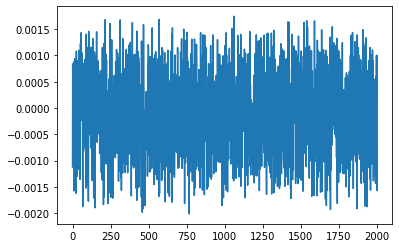

In [219]:
SubtractionTraining.PredictTheResult()
SubtractionTraining.PlotThePredicted_DF()

# Let us try to see if we can learn multiplication behavior between A and B

In [205]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 258us/sample - loss: 1141.9136
Epoch 2/25
8000/8000 [==============================] - 2s 234us/sample - loss: 1141.7547
Epoch 3/25
8000/8000 [==============================] - 2s 228us/sample - loss: 1141.7624
Epoch 4/25
8000/8000 [==============================] - 2s 238us/sample - loss: 1141.7286
Epoch 5/25
8000/8000 [==============================] - 2s 228us/sample - loss: 1141.7261
Epoch 6/25
8000/8000 [==============================] - 2s 230us/sample - loss: 1141.7096
Epoch 7/25
8000/8000 [==============================] - 2s 230us/sample - loss: 1141.7345
Epoch 8/25
8000/8000 [==============================] - 2s 229us/sample - loss: 1141.6844
Epoch 9/25
8000/8000 [==============================] - 2s 229us/sample - loss: 1141.6813
Epoch 10/25
8000/8000 [==============================] - 2s 225us/sample - loss: 1141.7002
Epoch 11/25
8000/8000 [==============================] - 2s 226us/sample - lo

In [206]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

-0.29

In [207]:
MultiplicationTraining.PredictOneVal(A=5,B=6)

-0.19

## Looks like it did a very bad job for multiplication. Given the code we can play with three parameters: number of nodes in each Dense layer, optimizer function, activation function and loss function. Let us first change Dense layer number of nodes. Let us double it and see if it helps.

In [208]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(DenseNodeSize=2000)

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 7s 816us/sample - loss: 1141.6739
Epoch 2/25
8000/8000 [==============================] - 7s 826us/sample - loss: 1141.5784
Epoch 3/25
8000/8000 [==============================] - 8s 996us/sample - loss: 1141.5423
Epoch 4/25
8000/8000 [==============================] - 7s 864us/sample - loss: 1141.5254
Epoch 5/25
8000/8000 [==============================] - 6s 799us/sample - loss: 1141.5061
Epoch 6/25
8000/8000 [==============================] - 6s 800us/sample - loss: 1141.5161
Epoch 7/25
8000/8000 [==============================] - 6s 808us/sample - loss: 1141.5147
Epoch 8/25
8000/8000 [==============================] - 6s 795us/sample - loss: 1141.4988
Epoch 9/25
8000/8000 [==============================] - 6s 794us/sample - loss: 1141.4848
Epoch 10/25
8000/8000 [==============================] - 6s 801us/sample - loss: 1141.5245
Epoch 11/25
8000/8000 [==============================] - 6s 804us/sample - lo

## Looks like it didn't help much in this particular case. Let us go to the optimizer and use RMSprop optimizer now and put back the number of nodes in dense layer back to 1000

In [210]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(optimizer='RMSprop')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 4s 449us/sample - loss: 1136.8713
Epoch 2/25
8000/8000 [==============================] - 3s 405us/sample - loss: 1136.2169
Epoch 3/25
8000/8000 [==============================] - 3s 402us/sample - loss: 1135.8102
Epoch 4/25
8000/8000 [==============================] - 4s 554us/sample - loss: 1135.4667
Epoch 5/25
8000/8000 [==============================] - 4s 491us/sample - loss: 1135.0168
Epoch 6/25
8000/8000 [==============================] - 3s 405us/sample - loss: 1135.8179
Epoch 7/25
8000/8000 [==============================] - 4s 463us/sample - loss: 1135.0970
Epoch 8/25
8000/8000 [==============================] - 3s 377us/sample - loss: 1135.5430
Epoch 9/25
8000/8000 [==============================] - 3s 410us/sample - loss: 1135.3214
Epoch 10/25
8000/8000 [==============================] - 3s 427us/sample - loss: 1135.0910
Epoch 11/25
8000/8000 [==============================] - 4s 527us/sample - lo

## Looks like it didn't help much in this particular case. Let us go to the activation and use relu activation now 

In [220]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(activation='relu')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 288us/sample - loss: 978.3456
Epoch 2/25
8000/8000 [==============================] - 2s 253us/sample - loss: 825.4620
Epoch 3/25
8000/8000 [==============================] - 2s 258us/sample - loss: 815.0098
Epoch 4/25
8000/8000 [==============================] - 2s 253us/sample - loss: 813.5421
Epoch 5/25
8000/8000 [==============================] - 2s 269us/sample - loss: 812.9176
Epoch 6/25
8000/8000 [==============================] - 2s 255us/sample - loss: 812.4081
Epoch 7/25
8000/8000 [==============================] - 2s 259us/sample - loss: 811.9347
Epoch 8/25
8000/8000 [==============================] - 2s 255us/sample - loss: 811.4772
Epoch 9/25
8000/8000 [==============================] - 2s 258us/sample - loss: 811.1309
Epoch 10/25
8000/8000 [==============================] - 2s 258us/sample - loss: 810.7616
Epoch 11/25
8000/8000 [==============================] - 2s 255us/sample - loss: 810.35

### Looks like it helped a bit. Let us try a different activation function selu

In [222]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(activation='selu')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 3s 318us/sample - loss: 957.0390
Epoch 2/25
8000/8000 [==============================] - 2s 275us/sample - loss: 605.6590
Epoch 3/25
8000/8000 [==============================] - 2s 276us/sample - loss: 540.5377
Epoch 4/25
8000/8000 [==============================] - 2s 277us/sample - loss: 526.6689
Epoch 5/25
8000/8000 [==============================] - 2s 275us/sample - loss: 524.3336
Epoch 6/25
8000/8000 [==============================] - 2s 277us/sample - loss: 523.3199
Epoch 7/25
8000/8000 [==============================] - 2s 277us/sample - loss: 522.4881
Epoch 8/25
8000/8000 [==============================] - 2s 282us/sample - loss: 521.7660
Epoch 9/25
8000/8000 [==============================] - 2s 285us/sample - loss: 521.2314
Epoch 10/25
8000/8000 [==============================] - 2s 282us/sample - loss: 520.7107
Epoch 11/25
8000/8000 [==============================] - 2s 288us/sample - loss: 520.28

### Little better but still far off. Time to move to the loss function while keeping the activation of selu intact. Let us try mean_squared_logarithmic_error

In [9]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(activation='relu',loss='mean_squared_logarithmic_error')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 3s 320us/sample - loss: 4.1437
Epoch 2/25
8000/8000 [==============================] - 2s 279us/sample - loss: 3.7590
Epoch 3/25
8000/8000 [==============================] - 2s 281us/sample - loss: 3.3962
Epoch 4/25
8000/8000 [==============================] - 2s 281us/sample - loss: 3.1173
Epoch 5/25
8000/8000 [==============================] - 2s 280us/sample - loss: 2.9180
Epoch 6/25
8000/8000 [==============================] - 2s 279us/sample - loss: 2.7784
Epoch 7/25
8000/8000 [==============================] - 2s 286us/sample - loss: 2.6813
Epoch 8/25
8000/8000 [==============================] - 2s 281us/sample - loss: 2.6103
Epoch 9/25
8000/8000 [==============================] - 2s 284us/sample - loss: 2.5587
Epoch 10/25
8000/8000 [==============================] - 2s 285us/sample - loss: 2.5201
Epoch 11/25
8000/8000 [==============================] - 2s 284us/sample - loss: 2.4904
Epoch 12/25
8000/80

In [11]:
MultiplicationTraining.PredictOneVal(A=5,B=5)

6.19

### As you can see it is relatively difficult. Why don't you play with it and find out a good solution.

### Let us move to Sin and Cos

In [19]:
SinTraining = Training_Tensorflow(OutputVector='Sin(Addition)')
SinTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 279us/sample - loss: 0.5747
Epoch 2/25
8000/8000 [==============================] - 2s 251us/sample - loss: 0.5234
Epoch 3/25
8000/8000 [==============================] - 2s 278us/sample - loss: 0.5075
Epoch 4/25
8000/8000 [==============================] - 2s 273us/sample - loss: 0.5012
Epoch 5/25
8000/8000 [==============================] - 2s 262us/sample - loss: 0.4983
Epoch 6/25
8000/8000 [==============================] - 2s 272us/sample - loss: 0.4969
Epoch 7/25
8000/8000 [==============================] - 2s 273us/sample - loss: 0.4962
Epoch 8/25
8000/8000 [==============================] - 2s 269us/sample - loss: 0.4958
Epoch 9/25
8000/8000 [==============================] - 2s 257us/sample - loss: 0.4955
Epoch 10/25
8000/8000 [==============================] - 2s 262us/sample - loss: 0.4954
Epoch 11/25
8000/8000 [==============================] - 2s 255us/sample - loss: 0.4953
Epoch 12/25
8000/80

In [23]:
CosTraining = Training_Tensorflow(OutputVector='Cos(Addition)')
CosTraining.TrainTheModel(activation='selu',loss='mean_absolute_error')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 3s 313us/sample - loss: 0.7059
Epoch 2/25
8000/8000 [==============================] - 2s 279us/sample - loss: 0.6760
Epoch 3/25
8000/8000 [==============================] - 2s 282us/sample - loss: 0.6605
Epoch 4/25
8000/8000 [==============================] - 2s 286us/sample - loss: 0.6521
Epoch 5/25
8000/8000 [==============================] - 2s 282us/sample - loss: 0.6475
Epoch 6/25
8000/8000 [==============================] - 2s 285us/sample - loss: 0.6447
Epoch 7/25
8000/8000 [==============================] - 2s 284us/sample - loss: 0.6431
Epoch 8/25
8000/8000 [==============================] - 2s 287us/sample - loss: 0.6421
Epoch 9/25
8000/8000 [==============================] - 2s 287us/sample - loss: 0.6415
Epoch 10/25
8000/8000 [==============================] - 2s 288us/sample - loss: 0.6411
Epoch 11/25
8000/8000 [==============================] - 2s 284us/sample - loss: 0.6408
Epoch 12/25
8000/80

In [24]:
CosTraining.PredictOneVal(A=0.5,B=0.5)

0.0

In [25]:
CosTraining.PredictOneVal(A=0.0,B=0.0)

0.0

### Looks like it is not working for Sin and Cos well either. Now we will see 2^Addition and log(Addition)

In [29]:
TwoPowerTraining = Training_Tensorflow(OutputVector='2^Addition')
TwoPowerTraining.TrainTheModel(activation='tanh',loss='mean_absolute_error')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 2s 283us/sample - loss: 5710.8631
Epoch 2/25
8000/8000 [==============================] - 2s 256us/sample - loss: 5710.8306
Epoch 3/25
8000/8000 [==============================] - 2s 256us/sample - loss: 5710.8099
Epoch 4/25
8000/8000 [==============================] - 2s 258us/sample - loss: 5710.7965
Epoch 5/25
8000/8000 [==============================] - 2s 257us/sample - loss: 5710.7874
Epoch 6/25
8000/8000 [==============================] - 2s 256us/sample - loss: 5710.7802
Epoch 7/25
8000/8000 [==============================] - 2s 261us/sample - loss: 5710.7739
Epoch 8/25
8000/8000 [==============================] - 2s 259us/sample - loss: 5710.7678
Epoch 9/25
8000/8000 [==============================] - 2s 280us/sample - loss: 5710.7616
Epoch 10/25
8000/8000 [==============================] - 2s 261us/sample - loss: 5710.7551
Epoch 11/25
8000/8000 [==============================] - 2s 258us/sample - lo

### Looks like it is not working much for this one either. Time for you to roll up tricks from your sleeves

## Now let us do classification on the final column and call it bye for this csv file. 
### To do that first we have to replace odd and even with 0 and 1 in the DF and thus we modify the class slightly.

In [21]:
class Training_Tensorflow_Classification:
    
    def __init__(self, 
                 A = Master_DF.A, 
                 B = Master_DF.B, 
                 OutputVector=None, 
                 ClassificationOrRegression="Regression"):
        
        self.Master_DF_Classification = Master_DF.copy()
        self.Master_DF_Classification.replace("Odd",0,inplace=True)
        self.Master_DF_Classification.replace("Even",1,inplace=True)
        self.A = A
        self.B = B
        self.OutputVector = OutputVector
        self.TypeOfTraining = ClassificationOrRegression
        self.Training_DF = None
        self.Test_DF = None
        self.Model = None
        self.Predicted_DF = None
        self.TrainTestSplit()
        
    def TrainTestSplit(self, TestFractionSize=0.2):
        self.Training_DF, self.Test_DF = train_test_split(self.Master_DF_Classification, test_size=TestFractionSize)
        
    def TrainTheModel(self, DenseNodeSize = 1000, activation='linear',optimizer='sgd', loss='mean_squared_error'):
        self.Model = tf.keras.Sequential()
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.compile(optimizer=optimizer,loss=loss)
        xs = np.array([(a,b) for a,b in zip(self.Training_DF.A,self.Training_DF.B)])
        ys = np.array(self.Training_DF[self.OutputVector], dtype='float')
        self.Model.fit(xs,ys,epochs=25)
        
    def PredictTheResult(self):
        self.Predicted_DF = pd.DataFrame(columns=['InputVals','PredictedVals','Difference'],dtype='float')
        self.Predicted_DF.InputVals = self.Test_DF[self.OutputVector]
        xs = np.array([(a,b) for a,b in zip(self.Test_DF.A,self.Test_DF.B)])
        self.Predicted_DF.PredictedVals = self.Model.predict(xs)[:len(self.Test_DF)]
        self.Predicted_DF.Difference = self.Predicted_DF.InputVals - self.Predicted_DF.PredictedVals
        
    def PredictOneVal(self, A=None, B=None):
        return np.round(self.Model.predict(np.array([[A,B]]))[0][0],2)
    
    def PlotThePredicted_DF(self):
        plt.figure()
        plt.plot(range(len(self.Test_DF)),self.Predicted_DF.Difference)
        plt.show()

In [22]:
OddEvenTraining = Training_Tensorflow_Classification(OutputVector='ODD_OR_EVEN(CEIL(A+B))')
OddEvenTraining.TrainTheModel(activation='softmax',loss='binary_crossentropy')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 3s 386us/sample - loss: 3.4103
Epoch 2/25
8000/8000 [==============================] - 3s 343us/sample - loss: 3.4103
Epoch 3/25
8000/8000 [==============================] - 3s 347us/sample - loss: 3.4103
Epoch 4/25
8000/8000 [==============================] - 3s 348us/sample - loss: 3.4103
Epoch 5/25
8000/8000 [==============================] - 3s 356us/sample - loss: 3.4103
Epoch 6/25
8000/8000 [==============================] - 2s 299us/sample - loss: 3.4103
Epoch 7/25
8000/8000 [==============================] - 2s 297us/sample - loss: 3.4103
Epoch 8/25
8000/8000 [==============================] - 2s 298us/sample - loss: 3.4103
Epoch 9/25
8000/8000 [==============================] - 2s 294us/sample - loss: 3.4103
Epoch 10/25
8000/8000 [==============================] - 2s 296us/sample - loss: 3.4103
Epoch 11/25
8000/8000 [==============================] - 2s 297us/sample - loss: 3.4103
Epoch 12/25
8000/80

In [23]:
OddEvenTraining.PredictOneVal(A=5,B=5)

0.0

In [24]:
OddEvenTraining.PredictOneVal(A=5,B=6)

0.0